In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# make sure you add a shortcut of "295R-Caps-Pattern" folder to your own Drive if you're shared this folder
!ls "/content/drive/My Drive/295R-Caps-Pattern/Data"

raw  subsampled


In [ ]:
# input folders
data = "/content/drive/My Drive/295R-Caps-Pattern/Data"

### BSR data

In [ ]:
# get id column of both datasets
bsr_full = pd.read_csv(f'{data}/raw/asin_bsr_history.csv')

In [ ]:
bsr_full.head()

,Unnamed: 0,date,rank,avg180_price,asin
0,0,2017-07-03,9003.666667,17.01,B000139ZHU
1,1,2017-07-04,8211.666667,17.01,B000139ZHU
2,2,2017-07-05,6475.000000,17.01,B000139ZHU
3,3,2017-07-06,10318.000000,17.01,B000139ZHU
4,4,2017-07-07,8335.500000,17.01,B000139ZHU


In [ ]:
#check how many different asins
bsr_full['asin'].drop_duplicates().count()

9991

In [ ]:
#checking how many entries per asin
bsr_by_asin=bsr_full.groupby('asin')['date'].nunique()
bsr_by_asin

asin
2635214875     466
B000052XB5    1460
B00005313T    1460
B0000533I2    1456
B00005K9DO    1413
              ... 
B096Z9KL3B      12
B096ZMC4PR       6
B0971W5NJD      17
B097C9ZBG1      16
B097Z1CVBV       2
Name: date, Length: 9991, dtype: int64

In [ ]:
#max and min number of collected ranks per asin
print(bsr_by_asin.max())
bsr_by_asin.min()

1461


2

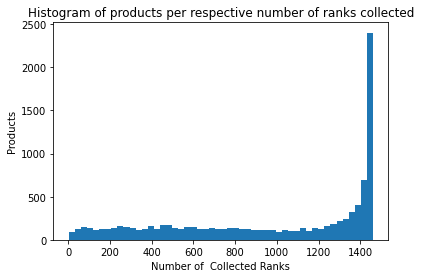

In [ ]:
#histogram of number of collected ranks per asin
n,bins,patches=plt.hist(bsr_by_asin,50)
plt.xlabel('Number of  Collected Ranks')
plt.ylabel('Products')
plt.title('Histogram of products per respective number of ranks collected')
plt.show()

The ranks were not consistently collected for each product. Some products have a few dozens of ranks collected over time, whereas some other products' ranks were tracked for around 1400 dates.

### review data

In [ ]:
review_full = pd.read_csv(f'{data}/raw/asin_review_history.csv')

In [ ]:
review_full.head()

,Unnamed: 0,asin,product_name,review_title,review_text,reviewrating,review_date,reviewvotes,reviewverifiedpurchase,reviewcommentcount,temp,country_name
0,0,B00R7FFYO8,Brain Octane Premium C8 MCT Oil from Non-GMO C...,Solution to pouring and storing,This review is being posted more as a solution...,5.0,2017-07-27,"1,652 people found this helpful",True,0,"Reviewed in the United States on July 27, 2017",United States
1,1,B00R7FFYO8,Brain Octane Premium C8 MCT Oil from Non-GMO C...,Works far beyond my expectations.,I work with my husband. He asked me what has g...,5.0,2018-01-09,591 people found this helpful,True,0,"Reviewed in the United States on January 9, 2018",United States
2,2,B00R7FFYO8,Brain Octane Premium C8 MCT Oil from Non-GMO C...,"When you take the cap off,","When you take the cap off, just poke a hole in...",4.0,2017-02-08,"1,205 people found this helpful",True,0,"Reviewed in the United States on February 8, 2017",United States
3,3,B00R7FFYO8,Brain Octane Premium C8 MCT Oil from Non-GMO C...,I'm not even sure this is legit bulletproof oi...,I normally order directly from bulletproof. Am...,1.0,2017-10-11,545 people found this helpful,True,0,"Reviewed in the United States on October 11, 2017",United States
4,4,B00R7FFYO8,Brain Octane Premium C8 MCT Oil from Non-GMO C...,Getting a definite bump in energy during the day.,I've been using this daily for 3 weeks now. I ...,4.0,2017-06-16,857 people found this helpful,True,0,"Reviewed in the United States on June 16, 2017",United States


In [ ]:
#As HL has computed, there are 9958 products which are in both the ranking and review datasets
prod_asin_rev = review_full['asin'].unique()
prod_asin_bsr = bsr_full['asin'].unique()
print(len(prod_asin_rev), 'unique products in reviews')
print(len(prod_asin_bsr), 'unique products in bsr')
intersection = list(set(prod_asin_rev).intersection(set(prod_asin_bsr)))
print(len(intersection), 'products in intersection')

9977 unique products in reviews
9991 unique products in bsr
9958 products in intersection


For each product in the intersection of the two data sets, want to know how many and which reviews were taken during the time frame where rankings were collected. 

In [ ]:
bsr_intersect_asin_dates=bsr_full[bsr_full['asin'].isin(intersection)].groupby('asin')['date'].apply(list)

In [ ]:
bsr_intersect_asin_dates

asin
2635214875    [2020-02-21, 2020-02-22, 2020-02-23, 2020-02-2...
B000052XB5    [2017-07-03, 2017-07-04, 2017-07-05, 2017-07-0...
B00005313T    [2017-07-03, 2017-07-04, 2017-07-05, 2017-07-0...
B0000533I2    [2017-07-03, 2017-07-04, 2017-07-05, 2017-07-0...
B00005K9DO    [2017-07-03, 2017-07-04, 2017-07-05, 2017-07-0...
                                    ...                        
B096Z9KL3B    [2021-06-21, 2021-06-22, 2021-06-23, 2021-06-2...
B096ZMC4PR    [2021-06-18, 2021-06-19, 2021-06-20, 2021-06-2...
B0971W5NJD    [2021-06-16, 2021-06-17, 2021-06-18, 2021-06-1...
B097C9ZBG1    [2021-06-17, 2021-06-18, 2021-06-19, 2021-06-2...
B097Z1CVBV    [2021-06-30, 2021-07-02, 2021-06-30, 2021-07-0...
Name: date, Length: 9958, dtype: object

In [ ]:
review_intersect_asin_dates=review_full[review_full['asin'].isin(intersection)].groupby('asin')['review_date'].apply(list)

In [ ]:
review_intersect_asin_dates

asin
2635214875    [2020-03-25, 2019-12-18, 2019-05-22, 2018-04-2...
B000052XB5    [2020-03-04, 2019-03-18, 2019-07-14, 2017-12-2...
B00005313T    [2016-11-28, 2021-01-22, 2019-11-03, 2021-06-2...
B0000533I2    [2019-06-19, 2019-03-12, 2020-01-23, 2018-06-0...
B00005K9DO    [2020-01-06, 2018-11-26, 2018-04-06, 2019-06-1...
                                    ...                        
B096Z9KL3B    [2021-04-26, 2020-12-15, 2021-05-18, 2021-01-2...
B096ZMC4PR    [2019-09-19, 2016-12-08, 2015-01-05, 2019-01-0...
B0971W5NJD    [2021-07-08, 2021-06-23, 2021-06-21, 2021-06-2...
B097C9ZBG1    [2019-12-01, 2019-07-30, 2019-07-26, 2019-07-0...
B097Z1CVBV    [2021-02-06, 2021-02-01, 2021-02-12, 2021-02-0...
Name: review_date, Length: 9958, dtype: object

In [ ]:
#Comparing the two, as they are ordered in the same way we can just compare the dates
dates_rankandreview=[]
for i in range(len(review_intersect_asin_dates)):
  dates_rankandreview.append(set(review_intersect_asin_dates[i]).intersection(set(bsr_intersect_asin_dates[i])))

In [ ]:
#Count the number of matches per product
num_dates_matching=[len(x) for x in dates_rankandreview]
print(num_dates_matching[:10])

[46, 499, 128, 129, 110, 198, 379, 115, 48, 83]


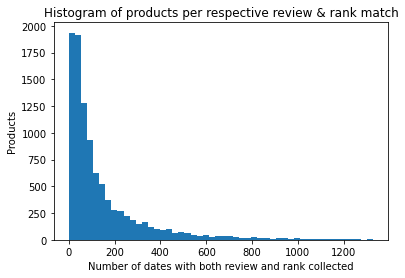

In [ ]:
#histogram of the number of dates where a review was recorded as well as the rank of the product
n,bins,patches=plt.hist(num_dates_matching,50)
plt.xlabel('Number of dates with both review and rank collected')
plt.ylabel('Products')
plt.title('Histogram of products per respective review & rank match')
plt.show()

We see that most products only have a few dates where both reviews and ranks were recorded. This is however not extremely problematic. (It actually looks better than what I expected.) We are really interested in having an overlap in time between the dates at which most reviews were collected and the ranking collected, i.e. it is not really important to have an exact match in the dates between the reviews and the rank. It would be interesting to figure out how well the dates of both data sets overlaps (maybe comparing min-max dates of both data sets for each product). In particular, we should get rid of outliers for which the dates at which the ranks were recorded do not match at all with the dates at which the reviews for the product were collected. I think that there will be quite a few such outliers, especially since some of the products ranks were only recorded on a few dozen of dates.
